In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_dataset.csv')
df.head(n=5)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


Let's check if the target variable (slice type) is balanced or not!

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
count,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000
mean,10.974923,11.476459,0.003079,114.126745,0.468100,0.531900,0.441187,0.558813,0.106291,0.057943,0.116107,0.057879,0.059716,0.117722,0.058734,0.425609,1.702150
std,6.053641,6.915643,0.004344,106.320976,0.498989,0.498989,0.496537,0.496537,0.308215,0.233639,0.320358,0.233519,0.236963,0.322283,0.235130,0.494443,0.822956
min,1.000000,0.000000,0.000001,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,6.000000,0.000001,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,11.000000,0.001000,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.000000,17.000000,0.010000,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,22.000000,23.000000,0.010000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Let's check if we have null data in any feature or not.

In [7]:
df.isnull().sum()

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64

Luckily, the dataset is pretty clean and does not have null data.

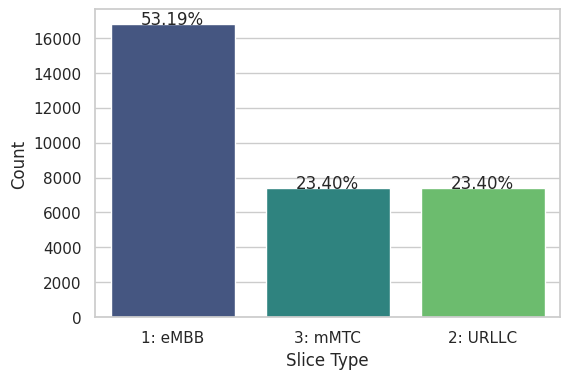

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each class
counts = df['slice Type'].value_counts()

# Calculate the percentage of each class
percentages = counts / len(df) * 100

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Replace the numbers with the corresponding class names
plot_df.index = plot_df.index.map({1: '1: eMBB', 2: '2: URLLC', 3: '3: mMTC'})

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=plot_df.index, y=plot_df['Count'], palette='viridis')

# Add the percentage on top of each bar
for i in range(plot_df.shape[0]):
    plt.text(i, plot_df['Count'].iloc[i], f'{plot_df["Percentage"].iloc[i]:.2f}%', ha='center')

# Show the plot
plt.xlabel('Slice Type')
plt.show()


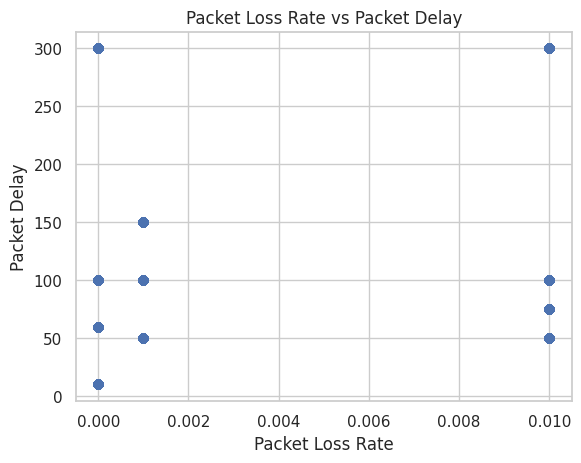

In [9]:
# Create a scatterplot of 'Packet Loss Rate' vs 'Packet Delay'
plt.scatter(df['Packet Loss Rate'], df['Packet delay'])
plt.title('Packet Loss Rate vs Packet Delay')
plt.xlabel('Packet Loss Rate')
plt.ylabel('Packet Delay')
plt.show()

Now let's plot the histograms of the train dataset to see the distribution of data!

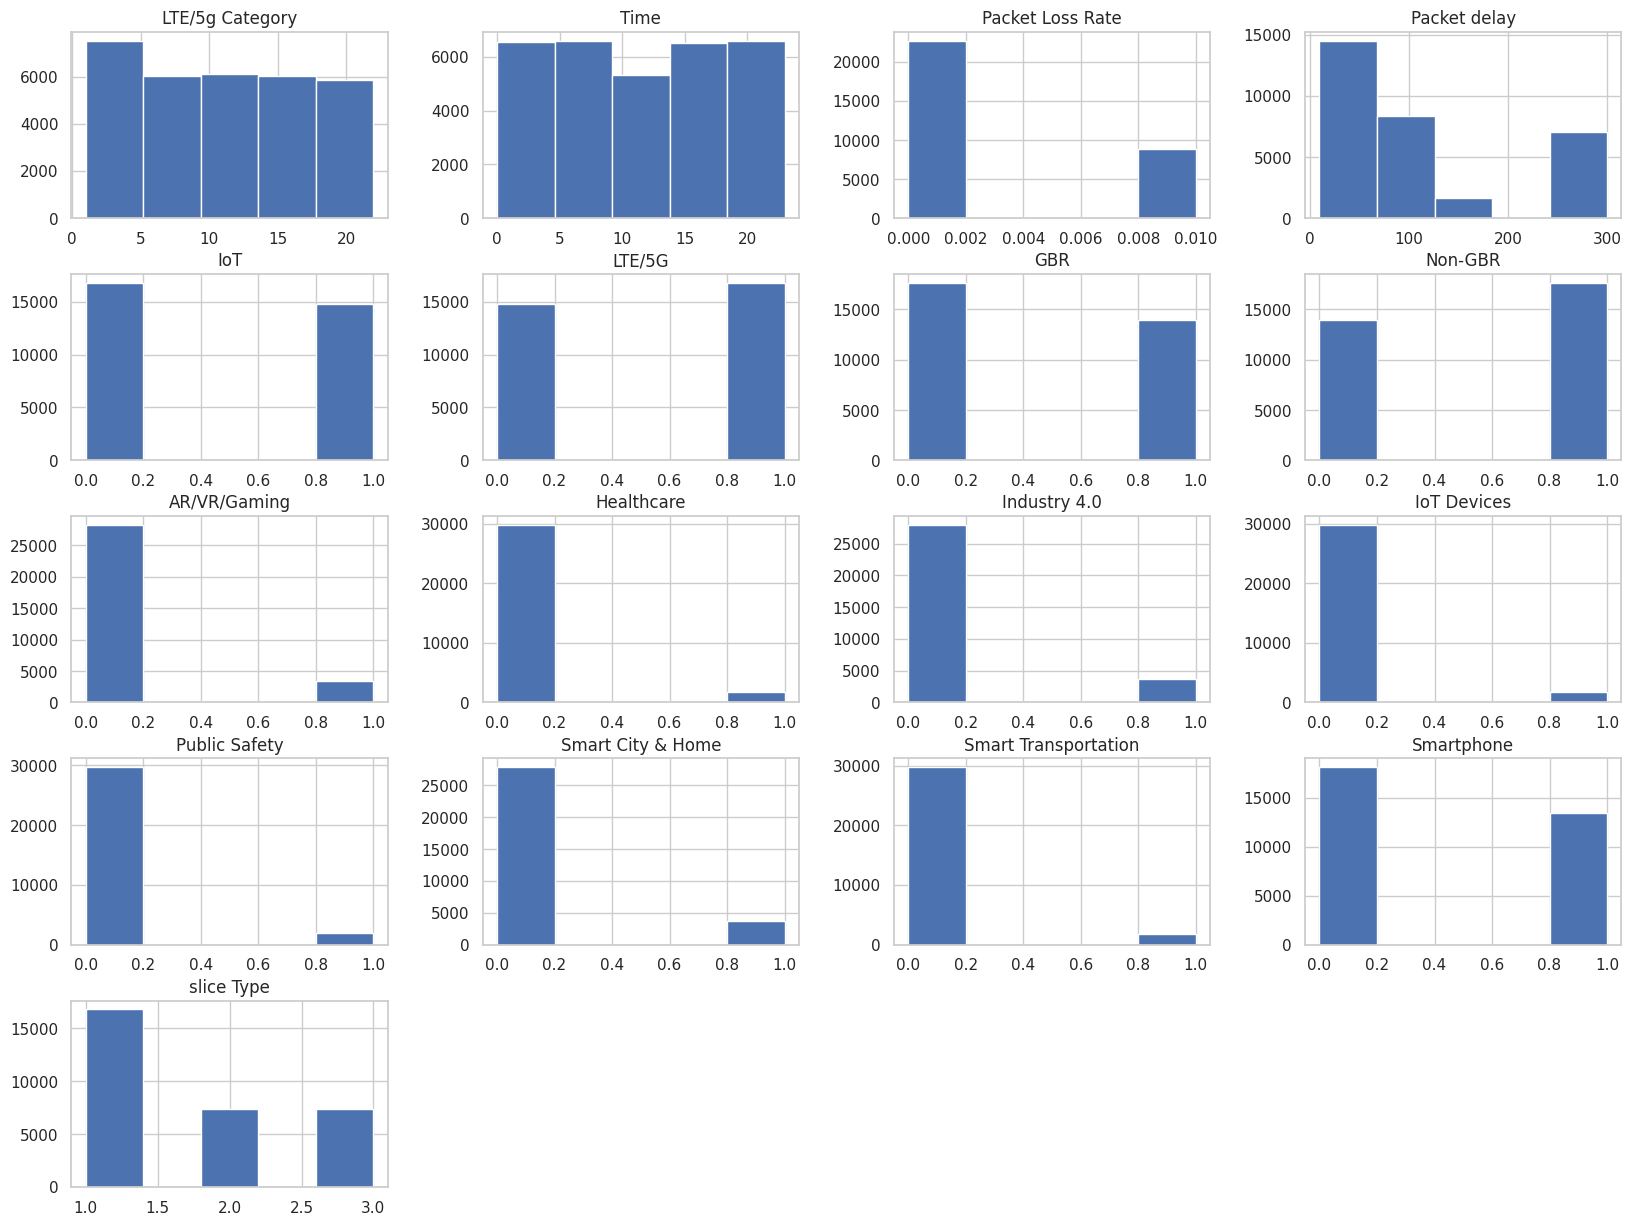

In [10]:
df.hist(bins=5, figsize=(20,15))
plt.show()

Exploratory Data Analysis (EDA): to understand the insights of the key characteristics of various entities of a given dataset like column(s), row(s), etc.

Correlation Matrices:


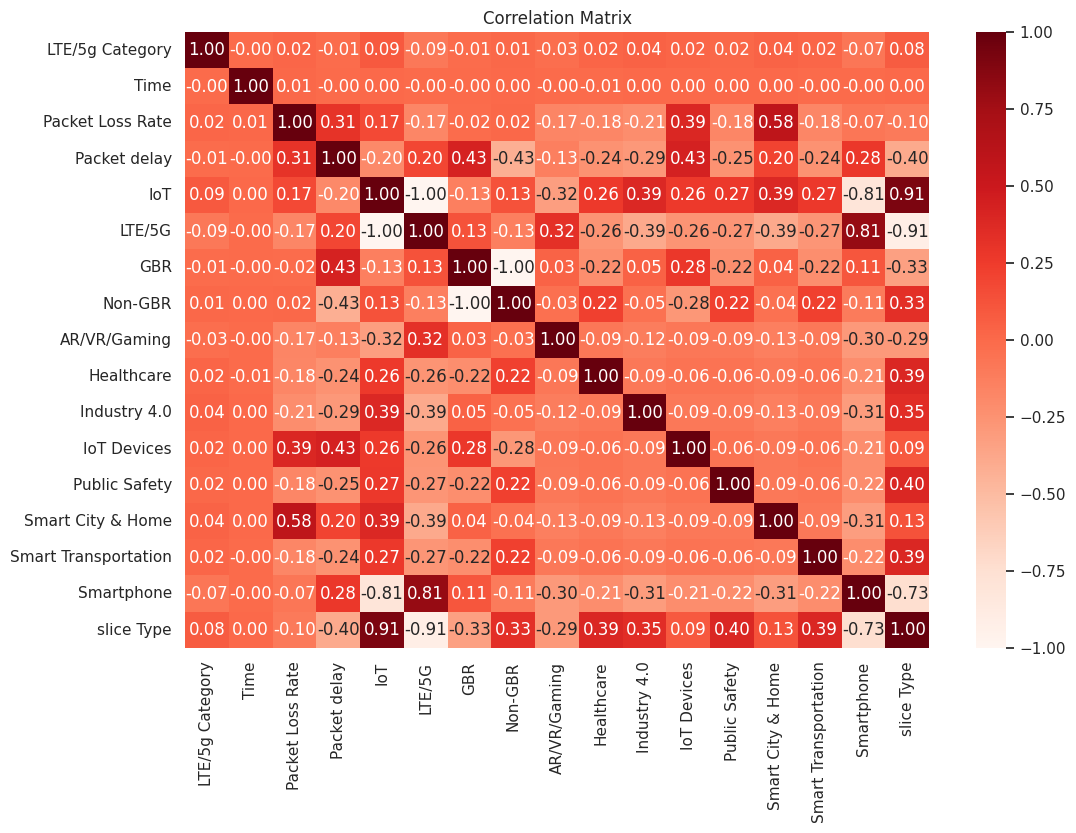

In [11]:
# Create a heatmap of the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# OR use this code:
# from plotly.express import imshow
# imshow(img=df.corr()['slice Type'].to_frame().T)

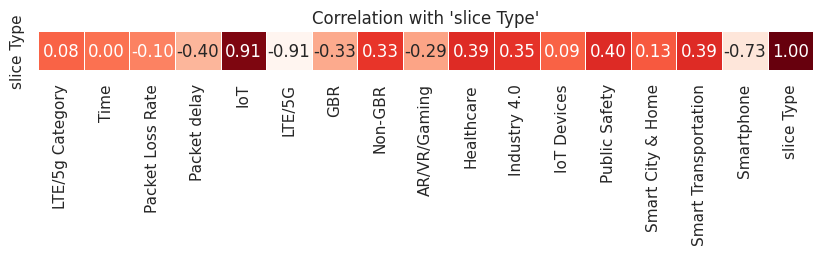

In [13]:
# Extract correlation values of 'slice Type' column
slice_type_correlation = correlation_matrix['slice Type']

plt.figure(figsize=(10, 0.5))
sns.heatmap(slice_type_correlation.to_frame().T, annot=True, cmap=plt.cm.Reds, fmt=".2f", cbar=False, linewidths=.5)
plt.title('Correlation with \'slice Type\'')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
plt.show()

# OR use this code:
# imshow(df.drop(columns='slice Type').corr()).show()

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Choose the column you want to correlate with (replace 'target_column' with the actual column name)
target_column = 'slice Type'

# Filter the correlation matrix to show only columns with correlations within the specified range
filtered_columns = correlation_matrix[(correlation_matrix[target_column] >= -0.1) & (correlation_matrix[target_column] <= 0.1)][target_column]

# Display the filtered columns
print(filtered_columns)

LTE/5g Category     0.076893
Time                0.001263
Packet Loss Rate   -0.097135
IoT Devices         0.089709
Name: slice Type, dtype: float64


Due to low correlation with 'slice Type', we will remove *LTE/5g Category, Time, Packet Loss Rate, and IoT Devices* from our train and test datasets for dimensionality reduction.

In [16]:
# df is the train dataset
df_test = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/test_dataset.csv')

# Remove specified columns
columns_to_remove = ['LTE/5g Category', 'Time', 'Packet Loss Rate', 'IoT Devices']
df_train_cleaned = df.drop(columns=columns_to_remove)
df_test_cleaned = df_test.drop(columns=columns_to_remove)

# Save cleaned datasets to CSV files
df_train_cleaned.to_csv('/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_cleaned.csv', index=False)
df_test_cleaned.to_csv('/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/test_cleaned.csv', index=False)

df_train_cleaned.head(5)


,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,10,1,0,0,1,0,0,0,1,0,0,0,3
1,100,0,1,1,0,1,0,0,0,0,0,0,1
2,300,0,1,0,1,0,0,0,0,0,0,1,1
3,100,0,1,0,1,0,0,0,0,0,0,1,1
4,50,1,0,0,1,0,0,0,0,1,0,0,2


In [17]:
df_test_cleaned.head(5)

,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,100,0,1,1,0,1,0,0,0,0,0,0
1,10,1,0,0,1,0,0,0,0,0,1,0
2,50,1,0,1,0,0,0,1,0,0,0,0
3,50,1,0,1,0,0,0,1,0,0,0,0
4,50,0,1,0,1,1,0,0,0,0,0,0


In [18]:
df_test_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31584 entries, 0 to 31583
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Packet delay          31584 non-null  int64
 1   IoT                   31584 non-null  int64
 2   LTE/5G                31584 non-null  int64
 3   GBR                   31584 non-null  int64
 4   Non-GBR               31584 non-null  int64
 5   AR/VR/Gaming          31584 non-null  int64
 6   Healthcare            31584 non-null  int64
 7   Industry 4.0          31584 non-null  int64
 8   Public Safety         31584 non-null  int64
 9   Smart City & Home     31584 non-null  int64
 10  Smart Transportation  31584 non-null  int64
 11  Smartphone            31584 non-null  int64
dtypes: int64(12)
memory usage: 2.9 MB


In [27]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Packet delay          31583 non-null  int64
 1   IoT                   31583 non-null  int64
 2   LTE/5G                31583 non-null  int64
 3   GBR                   31583 non-null  int64
 4   Non-GBR               31583 non-null  int64
 5   AR/VR/Gaming          31583 non-null  int64
 6   Healthcare            31583 non-null  int64
 7   Industry 4.0          31583 non-null  int64
 8   Public Safety         31583 non-null  int64
 9   Smart City & Home     31583 non-null  int64
 10  Smart Transportation  31583 non-null  int64
 11  Smartphone            31583 non-null  int64
 12  slice Type            31583 non-null  int64
dtypes: int64(13)
memory usage: 3.1 MB


We can use a function from this [link](https://www.kaggle.com/code/amohankumar/5g-network-slicing-analysis) to reduce memory usage of both datasets!

In [19]:
def reduce_mem_usage(train):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train.columns:
        col_type = train[col].dtype

        if col_type != object:
            c_min = train[col].min()
            c_max = train[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train[col] = train[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train[col] = train[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train[col] = train[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train[col] = train[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train[col] = train[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train[col] = train[col].astype(np.float32)
                else:
                    train[col] = train[col].astype(np.float64)
        else:
            train[col] = train[col].astype('object')

    end_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train

df_train_cleaned = reduce_mem_usage(df_train_cleaned)
df_train_cleaned.info()

Memory usage of dataframe is 3.13 MB
Memory usage after optimization is: 0.42 MB
Decreased by 86.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Packet delay          31583 non-null  int16
 1   IoT                   31583 non-null  int8 
 2   LTE/5G                31583 non-null  int8 
 3   GBR                   31583 non-null  int8 
 4   Non-GBR               31583 non-null  int8 
 5   AR/VR/Gaming          31583 non-null  int8 
 6   Healthcare            31583 non-null  int8 
 7   Industry 4.0          31583 non-null  int8 
 8   Public Safety         31583 non-null  int8 
 9   Smart City & Home     31583 non-null  int8 
 10  Smart Transportation  31583 non-null  int8 
 11  Smartphone            31583 non-null  int8 
 12  slice Type            31583 non-null  int8 
dtypes: int16(1), int8(12)
memory usage: 431.9 KB


As you can see, we have approximately 87% memory decrease using the function for the train dataset!

Now, let's do it for the test dataset:

In [20]:
df_test_cleaned = reduce_mem_usage(df_test_cleaned)
df_test_cleaned.info()

Memory usage of dataframe is 2.89 MB
Memory usage after optimization is: 0.39 MB
Decreased by 86.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31584 entries, 0 to 31583
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Packet delay          31584 non-null  int16
 1   IoT                   31584 non-null  int8 
 2   LTE/5G                31584 non-null  int8 
 3   GBR                   31584 non-null  int8 
 4   Non-GBR               31584 non-null  int8 
 5   AR/VR/Gaming          31584 non-null  int8 
 6   Healthcare            31584 non-null  int8 
 7   Industry 4.0          31584 non-null  int8 
 8   Public Safety         31584 non-null  int8 
 9   Smart City & Home     31584 non-null  int8 
 10  Smart Transportation  31584 non-null  int8 
 11  Smartphone            31584 non-null  int8 
dtypes: int16(1), int8(11)
memory usage: 401.1 KB


It had the same effect :-)



In [ ]:
#@title Boxplots for different features (not important)

df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_dataset.csv')
# Create a boxplot of the 'Packet Delay' column
plt.boxplot(df['Packet delay'])
plt.title('Packet Delay')
plt.show()

# Create a boxplot of the 'Packet Loss Rate' column
plt.boxplot(df['Packet Loss Rate'])
plt.title('Packet Loss Rate')
plt.show()

# Create a boxplot of the 'LTE/5g Category ' column
plt.boxplot(df['LTE/5g Category'])
plt.title('LTE/5g Category ')
plt.show()

# Create a boxplot of the 'Time  ' column
plt.boxplot(df['Time'])
plt.title('Time ')
plt.show()

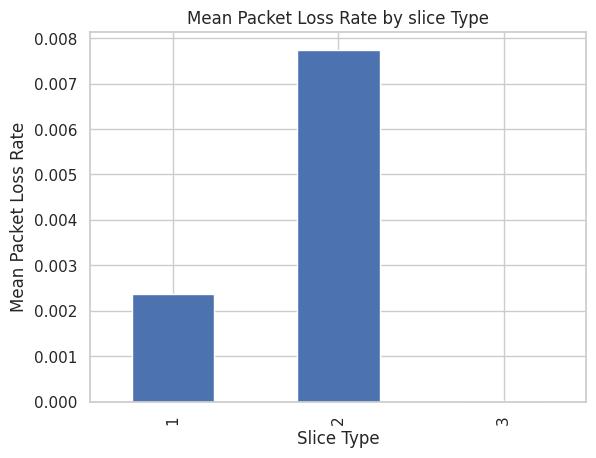

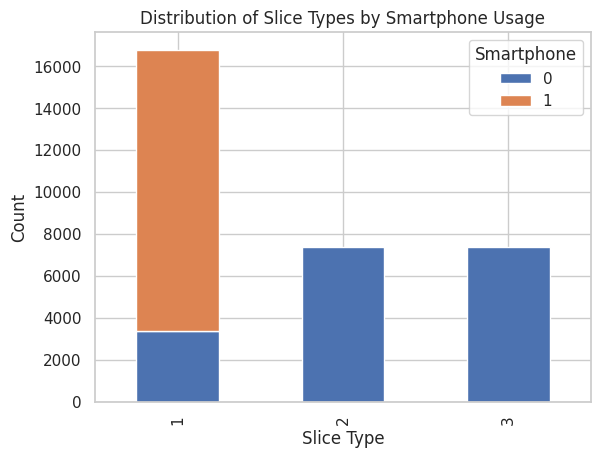

In [29]:
#@title Using group-by to see the correlation of some features

# Group the data by 'Slice type' and calculate the mean Packet Loss Rate for each group
grouped = df.groupby('slice Type')['Packet Loss Rate'].mean()

# Create a bar chart of the mean Packet Loss Rate for each Slice type
grouped.plot(kind='bar')
plt.title('Mean Packet Loss Rate by slice Type')
plt.xlabel('Slice Type')
plt.ylabel('Mean Packet Loss Rate')
plt.show()

# Group the data by 'Slice type' and 'Smartphone', and calculate the count of each group
grouped = df.groupby(['slice Type', 'Smartphone']).size().unstack()

# Create a stacked bar chart of the count of each group
grouped.plot(kind='bar', stacked=True)
plt.title('Distribution of Slice Types by Smartphone Usage')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()

In [ ]:
#@title Just playing around with some plots!

# Create a violin plot of the 'Packet Loss Rate' column
sns.violinplot(x=df['Packet Loss Rate'])
plt.title('Distribution of Packet Loss Rate')
plt.xlabel('Packet Loss Rate')
plt.show()

from pandas.plotting import scatter_matrix

# Create a scatterplot matrix of the numerical variables
numerical = df.drop(['slice Type', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone'], axis=1)
scatter_matrix(numerical, figsize=(10, 10))
plt.show()

#Hexbin plots are used to visualize the density of points in a scatterplot.
#Each hexagon represents a group of points, and the color of the hexagon represents
#the number of points in that group.

# Create a hexbin plot of the 'Packet Loss Rate' and 'Packet Delay' columns
plt.hexbin(df['Packet Loss Rate'], df['Packet delay'], gridsize=20, cmap='Blues')
plt.title('Packet Loss Rate vs Packet Delay')
plt.xlabel('Packet Loss Rate')
plt.ylabel('Packet delay')
plt.show()

In [ ]:
!pip install autoviz

In [31]:
#@title Using autoviz for showing the data type characteristics of the features
from autoviz.AutoViz_Class import AutoViz_Class
# import pandas as pd
# df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_dataset.csv')

%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=df,depVar='sliceType',verbose=1,max_rows_analyzed=df.shape[0]
               ,max_cols_analyzed=df.shape[1])

Shape of your Data Set loaded: (31583, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  12
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 31583 exceeds maximum, randomly sampling 31583 rows for EDA...

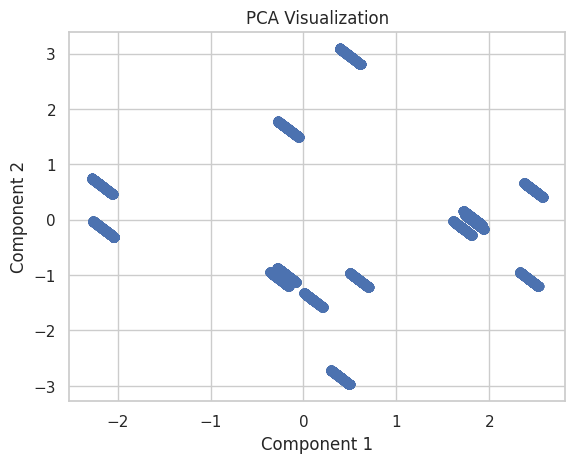

In [32]:
#@title Dimensionality Reduction using PCA

from sklearn.decomposition import PCA

# Drop the categorical variables from the dataframe
numerical = df.drop(['slice Type', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone'], axis=1)

# Standardize the numerical variables
standardized = (numerical - numerical.mean()) / numerical.std()

# Perform PCA with two components
pca = PCA(n_components=2)
components = pca.fit_transform(standardized)

# Create a scatterplot of the two principal components
plt.scatter(components[:, 0], components[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()